## Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.svm
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

## Data Preprocessing and Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


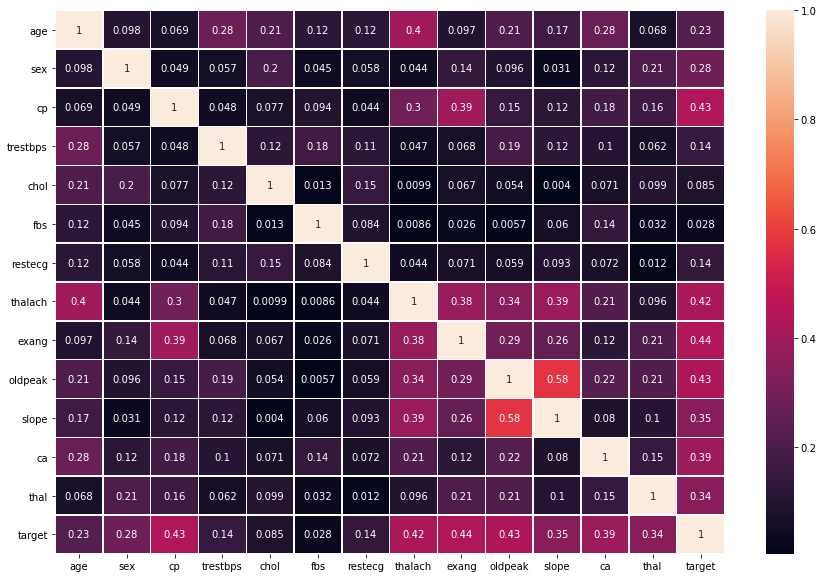

In [10]:
import seaborn as sns
fig, corr = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr().abs(), annot=True, linewidths=.5)
plt.show()

In [11]:
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [12]:
young_ages=df[(df.age>=29)&(df.age<40)]
middle_ages=df[(df.age>=40)&(df.age<60)]
elderly_ages=df[(df.age>=60)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 197
Elderly Ages : 90


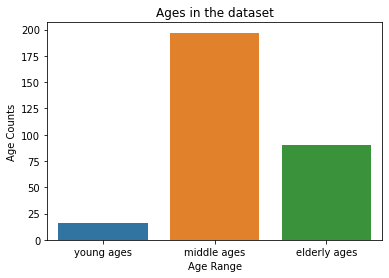

In [13]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.title('Ages in the dataset')
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.show()

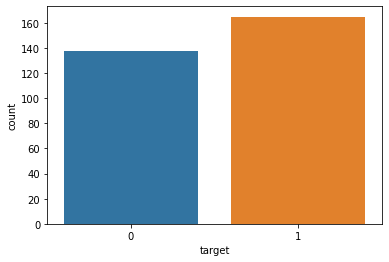

In [14]:
sns.countplot(x="target",data=df)
plt.show()

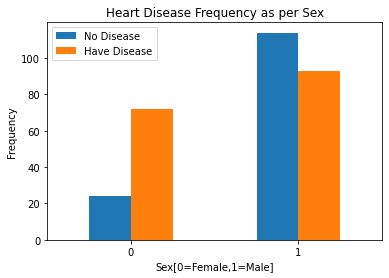

In [15]:
#Representing Heart Disease Frequency as per sex
pd.crosstab(df.sex,df.target).plot(kind="bar")
plt.title('Heart Disease Frequency as per Sex')
plt.xlabel('Sex[0=Female,1=Male]')
plt.xticks(rotation=0)
plt.legend(["No Disease","Have Disease"])
plt.ylabel("Frequency")
plt.show()

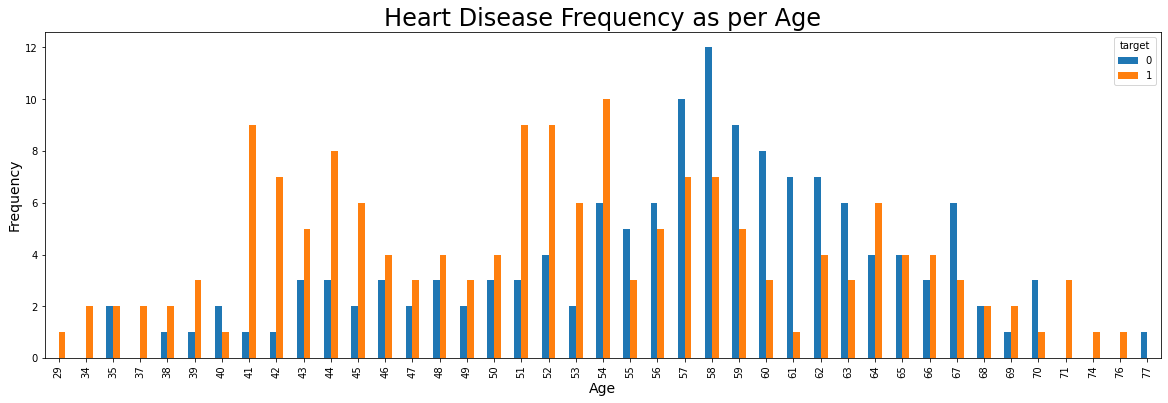

In [16]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title("Heart Disease Frequency as per Age",fontsize=24)
plt.xlabel('Age',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
plt.show()

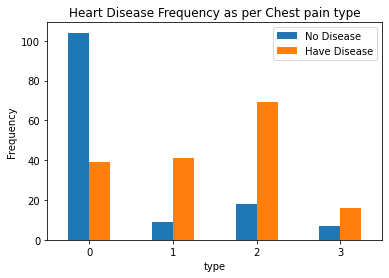

In [17]:
#Representing Heart Disease Frequency as per sex
pd.crosstab(df.cp,df.target).plot(kind="bar")
plt.title('Heart Disease Frequency as per Chest pain type')
plt.xlabel('type')
plt.xticks(rotation=0)
plt.legend(["No Disease","Have Disease"])
plt.ylabel("Frequency")
plt.show()

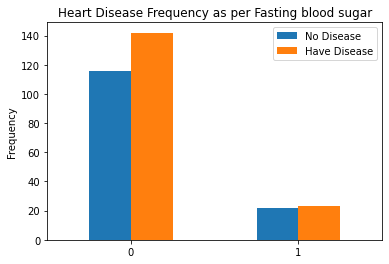

In [18]:
#Representing Heart Disease Frequency as per sex
pd.crosstab(df.fbs,df.target).plot(kind="bar")
plt.title('Heart Disease Frequency as per Fasting blood sugar')
plt.xlabel('')
plt.xticks(rotation=0)
plt.legend(["No Disease","Have Disease"])
plt.ylabel("Frequency")
plt.show()

In [19]:
#No.of people with heart disease
Heart_Disease_yes=len(df[df.target==1])
print(Heart_Disease_yes)

165


In [20]:
#No.of people without heart disease
Heart_Disease_no=len(df[df.target==0])
print(Heart_Disease_no)

138


In [21]:
#Have Heart Disease Percentage:
Percentage_positive=Heart_Disease_yes/len(df.target) * 100
print(Percentage_positive)

54.45544554455446


In [22]:
#Have Heart Disease Percentage:
Percentage_negative=Heart_Disease_no/len(df.target) * 100
print(Percentage_negative)

45.54455445544555


In [23]:
Females = len(df[df.sex==0])
Males = len(df[df.sex==1])
print("No. of Females: ",Females)
print("No. of Males: ",Males)

No. of Females:  96
No. of Males:  207


## Training and test data

In [24]:
X = df.iloc[:,:13]

In [25]:
Y = df.iloc[:,-1:]

In [26]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [27]:
Y.head()

,target
0,1
1,1
2,1
3,1
4,1


## Splitting the data into training and testing sets

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=1)

In [29]:
X_train.shape

(242, 13)

In [30]:
X_test.shape

(61, 13)

In [31]:
k = int((len(X_train)**1/2)/2)
k

60

In [32]:
#Applying KNN Classification Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,r2_score
knn_acc=[]
for k in range(1,k):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    Y_pred=knn.predict(X_test)
    acc_knn = accuracy_score(Y_test,Y_pred)*100
    knn_acc.append(acc_knn)
k_value=knn_acc.index(max(knn_acc))+1
k_value

24

In [33]:
knn = KNeighborsClassifier(n_neighbors = k_value)
knn.fit(X_train, Y_train)
Y_pred=knn.predict(X_test)
acc_knn = accuracy_score(Y_test,Y_pred)*100
print("Accuracy of KNN: {:.2f}%".format(acc_knn))

Accuracy of KNN: 65.57%


In [34]:
#Applying Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, Y_train)
acc_rf = rf.score(X_test,Y_test)*100
print(" Accuracy of Random Forest Algorithm : {:.2f}%".format(acc_rf))

 Accuracy of Random Forest Algorithm : 80.33%


In [35]:
#Applying Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(min_samples_split=.1)
dtc.fit(X_train, Y_train)
acc_dtc = dtc.score(X_test, Y_test)*100
print("Accuracy of Decision Tree Classifier {:.2f}%".format(acc_dtc))

Accuracy of Decision Tree Classifier 77.05%


In [36]:
#Applying SVM Algorithm
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train,Y_train)
acc_svm = svm.score(X_test,Y_test)*100
print("Accuracy of SVM Algorithm: {:.2f}%".format(acc_svm))

Accuracy of SVM Algorithm: 55.74%


In [37]:
#Applying Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
acc_lr = lr.score(X_test,Y_test)*100
print("Accuracy of Logistic Regression: {:.2f}%".format(acc_lr))

Accuracy of Logistic Regression: 77.05%


In [38]:
#Applying Gaussian Naive Bayes Algorithm to our Dataset
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
acc_nb = nb.score(X_test,Y_test)*100
print("Accuracy of Naive Bayes: {:.2f}%".format(acc_nb))

Accuracy of Naive Bayes: 77.05%


Comparisation of different models:

                     Accuracy Percentage
KNN                            65.573770
Random Forest                  80.327869
Decision Tree                  77.049180
SVM                            55.737705
Logistic Regression            77.049180
Naive Bayes                    77.049180


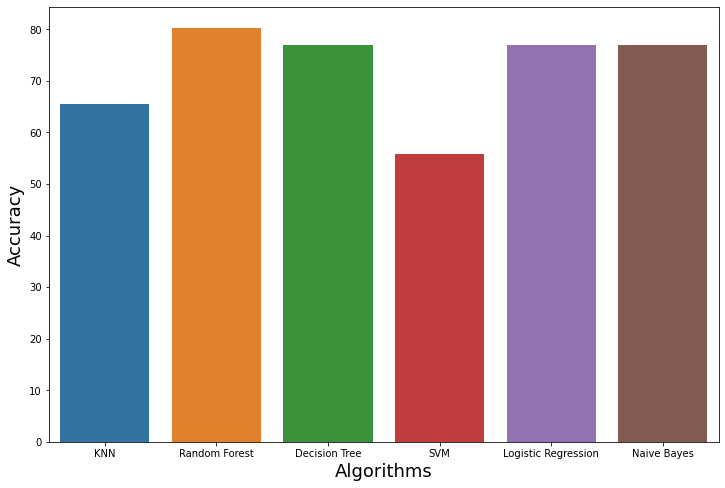

In [39]:
#Comparing Different Models applied to our Dtaset
print("Comparisation of different models:\n")
methods = ["KNN",  "Random Forest","Decision Tree", "SVM", "Logistic Regression","Naive Bayes"]
accuracy = [acc_knn, acc_rf, acc_dtc, acc_svm, acc_lr, acc_nb]
comp= pd.DataFrame(accuracy, index=methods, columns=["Accuracy Percentage"])
print(comp)

plt.figure(figsize=(12,8))
plt.yticks(np.arange(0,110,10))
plt.ylabel("Accuracy", fontsize=18)
plt.xlabel("Algorithms", fontsize=18)
sns.barplot(x=methods, y=accuracy)
plt.show()

In [40]:
y_knn = knn.predict(X_test)
y_lr = lr.predict(X_test)
y_svm = svm.predict(X_test)
y_nb = nb.predict(X_test)
y_dtc = dtc.predict(X_test)
y_rf = rf.predict(X_test)

In [41]:
print("Classification Report:\n")
print("1.KNN:\n",classification_report(y_knn,Y_test))
print("2.RF:\n",classification_report(y_rf,Y_test))
print("3.DT:\n",classification_report(y_dtc,Y_test))
print("4.SVM:\n",classification_report(y_svm,Y_test))
print("5.LR:\n",classification_report(y_lr,Y_test))
print("6.NB:\n",classification_report(y_nb,Y_test))

Classification Report:

1.KNN:
               precision    recall  f1-score   support

           0       0.57      0.68      0.62        25
           1       0.74      0.64      0.69        36

    accuracy                           0.66        61
   macro avg       0.65      0.66      0.65        61
weighted avg       0.67      0.66      0.66        61

2.RF:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79        26
           1       0.87      0.77      0.82        35

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61

3.DT:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        30
           1       0.77      0.77      0.77        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77     

In [42]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(Y_test,y_lr)
cm_knn = confusion_matrix(Y_test,y_knn)
cm_svm = confusion_matrix(Y_test,y_svm)
cm_nb = confusion_matrix(Y_test,y_nb)
cm_dtc = confusion_matrix(Y_test,y_dtc)
cm_rf = confusion_matrix(Y_test,y_rf)

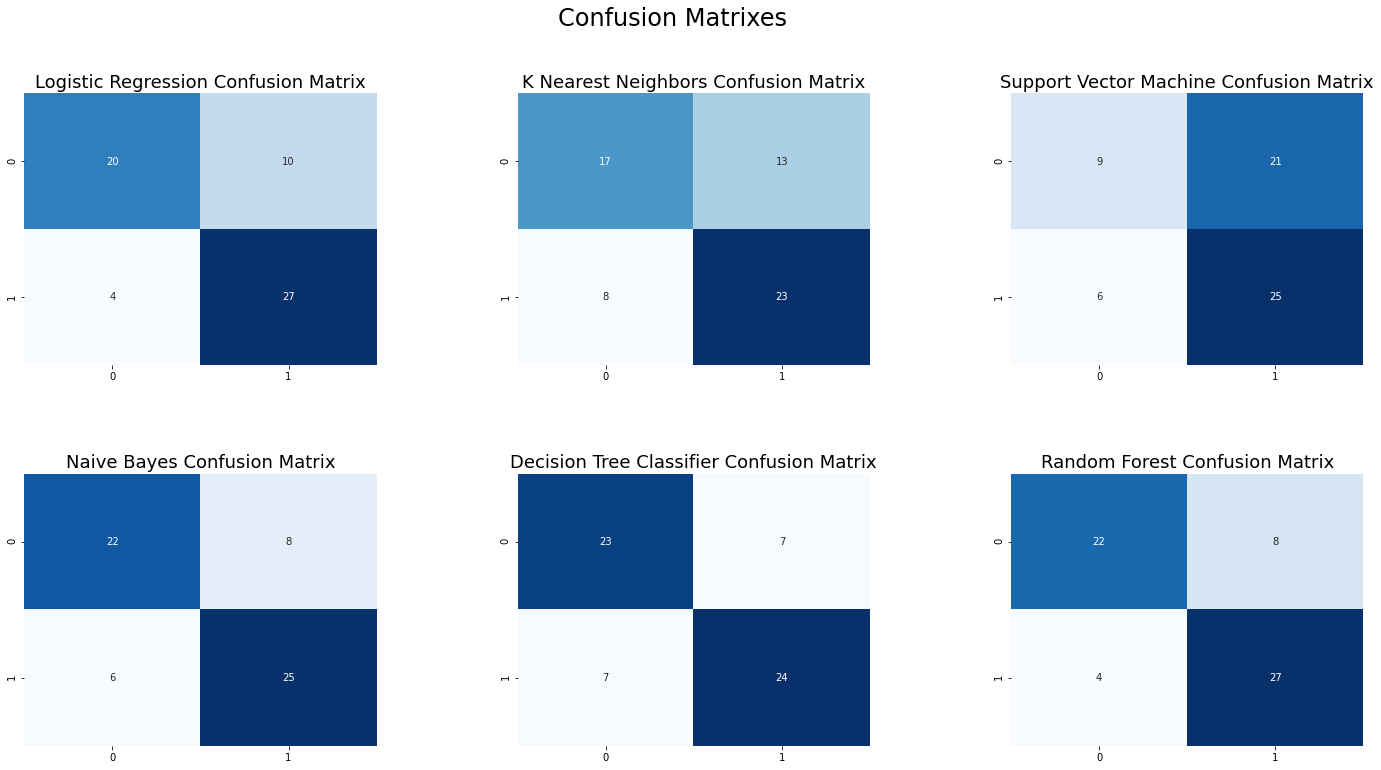

In [43]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix", fontsize=18)
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix", fontsize=18)
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix", fontsize=18)
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix", fontsize=18)
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix", fontsize=18)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix", fontsize=18)
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()